In [16]:
import pandas as pd
import numpy as np
import os
import sys
import glob
import re
import json
import shutil

In [38]:
outputfolder_path_list = [
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250522_182145_gpt4o",
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3",
]

In [21]:
def categorize_files(outputfolder_path_list):
    """
    Categorize files in the output folders into metrics report files, metadata files, and log files.

    Args:
        outputfolder_path_list (list): List of output folder paths.

    Returns:
        dict: A dictionary containing categorized files.
    """
    file_list = []
    for outputfolder_path in outputfolder_path_list:
        file_list.extend(glob.glob(os.path.join(outputfolder_path, "*")))

    categorized_files = {
        "metrics_report_files": [f for f in file_list if "metrics_report" in f],
        "metadata_files": [f for f in file_list if "metadata" in f],
        "log_files": [f for f in file_list if "log" in f],
    }

    print("Metrics Report Files:")
    for file in categorized_files["metrics_report_files"]:
        print(file)
    print("\nMetadata Files:")
    for file in categorized_files["metadata_files"]:
        print(file)
    print("\nLog Files:")
    for file in categorized_files["log_files"]:
        print(file)

    return categorized_files
    

In [35]:
def load_metadata(metadata_path_list):
    """
    Load metadata from a CSV file into a DataFrame.
    
    Args:
        metadata_path (str): Path to the metadata CSV file.
        
    Returns:
        pd.DataFrame: DataFrame containing the metadata.
    """
    df_mdata = pd.DataFrame()
    for m_path in metadata_path_list:
        try:
            df = pd.read_csv(m_path)
            # Extract model name, task, dataset, and timestamp from the metadata path
            match = re.search(
                r"\\([^\\]+)_([^_]+)_([^_]+)_(\d{8}_\d{6})_metadata\.csv$", m_path
            )
            if match:
                model_name, task, dataset, timestamp = match.groups()
                print(f"Model Name: {model_name}, Task: {task}, Dataset: {dataset}, Timestamp: {timestamp}")
                # Add extracted metadata to the DataFrame
                df['model_name'] = model_name
                df['task'] = task
                df['dataset'] = dataset
                df['timestamp'] = timestamp

            else:
                print("Failed to extract metadata details from the path. Using default values.")
                df['model_name'] = "Unknown"
                df['task'] = "Unknown"
                df['dataset'] = "Unknown"
                df['timestamp'] = "Unknown"
            
            # Append the DataFrame to the main DataFrame
            df_mdata = pd.concat([df_mdata, df], ignore_index=True)

        except Exception as e:
            print(f"Error loading metadata: {e}")
            continue
    return df_mdata

In [27]:
def load_metrics_report_as_df(metrics_report_path):
    """
    Load metrics report from a JSON file and return it as a DataFrame.
    
    Args:
        metrics_report_path (str): Path to the metrics report JSON file.
        
    Returns:
        pd.DataFrame: DataFrame containing the metrics report.
    """
    try:
        with open(metrics_report_path, 'r') as f:
            metrics_report = json.load(f)
        df = pd.DataFrame(metrics_report)
        return df
    except Exception as e:
        print(f"Error loading metrics report: {e}")
        return None

In [39]:
cat_files = categorize_files(outputfolder_path_list)

Metrics Report Files:
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250522_182145_gpt4o\GPT4oModel_metrics_report.json
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3\Llama3Model_metrics_report.json

Metadata Files:
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250522_182145_gpt4o\GPT4oModel_mortality_hirid_20250522_182145_metadata.csv
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3\Llama3Model_aki_miiv_20250527_173753_metadata.csv
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3\Llama3Model_mortality_miiv_20250527_173753_metadata.csv
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3\Llama3Model_sepsis_miiv_20250527_173753_metadata.csv

Log Files:
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250522_182145_gpt4o\log_20250522_182145.log
C:\Users\janbe\Documents\GitHub Repos\pulse\output\20250527_173753_llama3\log_20250527_173753.log


In [40]:
df_metadata = load_metadata(cat_files["metadata_files"])

Model Name: GPT4oModel, Task: mortality, Dataset: hirid, Timestamp: 20250522_182145
Model Name: Llama3Model, Task: aki, Dataset: miiv, Timestamp: 20250527_173753
Model Name: Llama3Model, Task: mortality, Dataset: miiv, Timestamp: 20250527_173753
Model Name: Llama3Model, Task: sepsis, Dataset: miiv, Timestamp: 20250527_173753


In [42]:
df_metadata.head(20)

,Input Prompt,Target Label,Predicted Probability,Predicted Diagnosis,Predicted Explanation,Inference Time,Input Tokens,Output Tokens,model_name,task,dataset,timestamp,Tokenization Time
0,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,The patient exhibits several critical abnormal...,3.013184,1773,163,GPT4oModel,mortality,hirid,20250522_182145,NaN
1,Suggest a diagnosis of mortality for the follo...,0,0.92,mortality,The patient exhibits multiple critical abnorma...,2.206459,1775,201,GPT4oModel,mortality,hirid,20250522_182145,NaN
2,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,Patient exhibits multiple abnormal values indi...,2.834919,1775,183,GPT4oModel,mortality,hirid,20250522_182145,NaN
3,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,The patient has several critical abnormalities...,2.766781,1773,210,GPT4oModel,mortality,hirid,20250522_182145,NaN
4,Suggest a diagnosis of mortality for the follo...,0,0.95,mortality,The patient exhibits multiple critical abnorma...,52.409574,1779,193,GPT4oModel,mortality,hirid,20250522_182145,NaN
5,Suggest a diagnosis of mortality for the follo...,0,0.15,not-mortality,Most parameters are within acceptable ranges. ...,1.363125,1773,115,GPT4oModel,mortality,hirid,20250522_182145,NaN
6,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,The patient exhibits multiple critical abnorma...,2.739816,1775,184,GPT4oModel,mortality,hirid,20250522_182145,NaN
7,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,The patient has several abnormal and concernin...,3.085435,1773,158,GPT4oModel,mortality,hirid,20250522_182145,NaN
8,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,Patient is elderly (age 80) with hypoalbuminem...,52.802763,1773,120,GPT4oModel,mortality,hirid,20250522_182145,NaN
9,Suggest a diagnosis of mortality for the follo...,0,0.85,mortality,The patient exhibits several critical abnormal...,4.024165,1773,236,GPT4oModel,mortality,hirid,20250522_182145,NaN


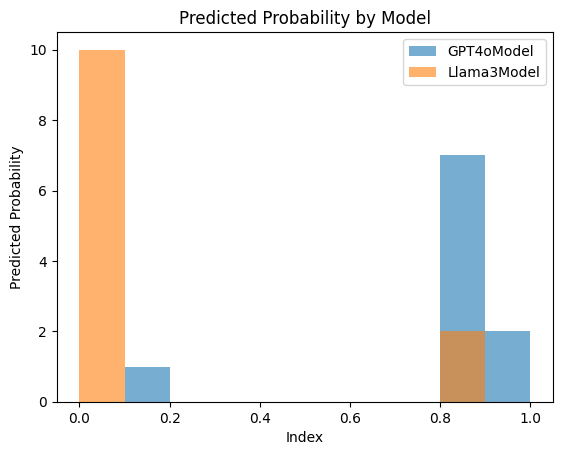

In [48]:
import matplotlib.pyplot as plt

for model in df_metadata['model_name'].unique():
    subset = df_metadata[df_metadata['model_name'] == model]
    plt.hist(subset['Predicted Probability'], bins=np.arange(0, 1.1, 0.1), alpha=0.6, label=model)

plt.xlabel('Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability by Model')
plt.legend()
plt.show()